In [1]:
import torch 
import torch.nn as nn 
from torch.autograd import Variable 
import torch.utils.data as Data 
import torchvision 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import csv
import codecs
from sklearn.model_selection import cross_val_score,train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\dyy\Desktop\12.csv")


In [3]:
def minmaxscaler(df):
    min = np.amin(df)
    max = np.amax(df)    
    return (df - min)/(max-min)



In [4]:
X = df.values[:, 0:8]
Y = df.values[:, 8:229]

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(minmaxscaler(X), minmaxscaler(Y), test_size=0.2, random_state=0)


In [6]:

x_tra = torch.from_numpy(X_train)
x_tra = x_tra.float()
x_tes = torch.from_numpy(X_test)
x_tes = x_tes.float()
y_tra = torch.from_numpy(Y_train)
y_tra = y_tra.float()
y_tes = torch.from_numpy(Y_test)
y_tes = y_tes.float()

In [7]:
#use_gpu = torch.cuda.is_available()


In [8]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


In [9]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(8, 1000),
            torch.nn.Dropout(0.2),
            torch.nn.ReLU(),
            
            torch.nn.Linear(1000, 800),
            torch.nn.Dropout(0.2),
            torch.nn.ReLU(),
            torch.nn.Linear(800, 600),
            torch.nn.Dropout(0.2),
            torch.nn.ReLU(),
            torch.nn.Linear(600, 500),
            torch.nn.Dropout(0.2),
            torch.nn.ReLU(),
            torch.nn.Linear(500, 300),
            torch.nn.Dropout(0.2),
            torch.nn.ReLU(),
            torch.nn.Linear(300, 250),
            torch.nn.Dropout(0.2),
            torch.nn.ReLU(),
            torch.nn.Linear(250, 221)

        )

        # init

    def forward(self, x):
        x = self.mlp(x)
        return x

In [10]:
lossData=[[]]
model = MLP()
loss_func = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), 0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
#if(use_gpu):
#    model = model.cuda()
#    loss_func = loss_func.cuda()
#    x_tra,y_tra = x_tra.cuda(),y_tra.cuda()
    #loss = loss.cpu()
   # batch_loss = batch_loss.cpu()

In [11]:
batch_size =128
epochs = 30000

step = 0
losses = []
for i in range(epochs):
     batch_loss = []
    # start和end分别是提取一个batch数据的起始和终止下标
     for start in range(0, len(x_tra), batch_size):
        end = start + batch_size if start + batch_size < len(x_tra) else len(x_tra)
        xx = torch.tensor(x_tra[start:end], dtype = torch.float, requires_grad = False).to(device)
        yy = torch.tensor(y_tra[start:end], dtype = torch.float, requires_grad = False).to(device)
        predict = model(xx)
        loss =loss_func(predict, yy)
        optim.zero_grad()
        loss.backward()
        optim.step()
        step += 1
        batch_loss.append(loss.data.cpu().numpy())
    
    # 每隔100步输出一下损失值（loss）
     if i % 100==0:
        losses.append(np.mean(batch_loss))
        print("epoch :{},step : {} , loss : {}".format(i+1,step,loss))
 #   y_hat = model(x_tra)
 #   loss = loss_func(y_hat, y_tra)
  #  optim.zero_grad()
  #  loss.backward()
  #  optim.step()
  
  #  if((i+1)%10 == 0):
   #     print("{}\t {:.5f}".format(i+1,loss.item()))



<ipython-input-11-7b9acc6874c6>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx = torch.tensor(x_tra[start:end], dtype = torch.float, requires_grad = False).to(device)
<ipython-input-11-7b9acc6874c6>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yy = torch.tensor(y_tra[start:end], dtype = torch.float, requires_grad = False).to(device)


epoch :1,step : 41 , loss : 0.016830626875162125
epoch :101,step : 4141 , loss : 0.0016389713855460286
epoch :201,step : 8241 , loss : 0.0010142147075384855
epoch :301,step : 12341 , loss : 0.000577441998757422
epoch :401,step : 16441 , loss : 0.0005230423994362354
epoch :501,step : 20541 , loss : 0.0005132767255418003
epoch :601,step : 24641 , loss : 0.0005316976457834244
epoch :701,step : 28741 , loss : 0.0005404211697168648
epoch :801,step : 32841 , loss : 0.0004921379731968045
epoch :901,step : 36941 , loss : 0.0005138294072821736
epoch :1001,step : 41041 , loss : 0.000680828932672739
epoch :1101,step : 45141 , loss : 0.0005196492420509458
epoch :1201,step : 49241 , loss : 0.0005135469837114215
epoch :1301,step : 53341 , loss : 0.0005308883264660835
epoch :1401,step : 57441 , loss : 0.0005021122051402926
epoch :1501,step : 61541 , loss : 0.000546218769159168
epoch :1601,step : 65641 , loss : 0.0006775285000912845
epoch :1701,step : 69741 , loss : 0.0005820962833240628
epoch :1801,s

epoch :14501,step : 594541 , loss : 0.0007708327029831707
epoch :14601,step : 598641 , loss : 0.0007015826995484531
epoch :14701,step : 602741 , loss : 0.0007568413857370615
epoch :14801,step : 606841 , loss : 0.0007229245384223759
epoch :14901,step : 610941 , loss : 0.0006918380386196077
epoch :15001,step : 615041 , loss : 0.0007885644445195794
epoch :15101,step : 619141 , loss : 0.0006902084569446743
epoch :15201,step : 623241 , loss : 0.0007392664556391537
epoch :15301,step : 627341 , loss : 0.000778566172812134
epoch :15401,step : 631441 , loss : 0.0007323838653974235
epoch :15501,step : 635541 , loss : 0.0007401672191917896
epoch :15601,step : 639641 , loss : 0.0007160381064750254
epoch :15701,step : 643741 , loss : 0.0007019126205705106
epoch :15801,step : 647841 , loss : 0.0007017900934442878
epoch :15901,step : 651941 , loss : 0.0007136456551961601
epoch :16001,step : 656041 , loss : 0.0006902604945935309
epoch :16101,step : 660141 , loss : 0.0007331721717491746
epoch :16201,st

epoch :28601,step : 1172641 , loss : 0.000706494611222297
epoch :28701,step : 1176741 , loss : 0.000733303721062839
epoch :28801,step : 1180841 , loss : 0.000758080743253231
epoch :28901,step : 1184941 , loss : 0.0007872807909734547
epoch :29001,step : 1189041 , loss : 0.0007525242981500924
epoch :29101,step : 1193141 , loss : 0.0007437963504344225
epoch :29201,step : 1197241 , loss : 0.00075967499287799
epoch :29301,step : 1201341 , loss : 0.00078013219172135
epoch :29401,step : 1205441 , loss : 0.0008287490927614272
epoch :29501,step : 1209541 , loss : 0.0007353921537287533
epoch :29601,step : 1213641 , loss : 0.0007620264077559114
epoch :29701,step : 1217741 , loss : 0.0008501448901370168
epoch :29801,step : 1221841 , loss : 0.0008733764407224953
epoch :29901,step : 1225941 , loss : 0.0008929770556278527


In [12]:
test=pd.DataFrame(data=losses)
test.to_csv('./loss_MLP1.csv',encoding='gbk')


Text(0, 0.5, 'loss')

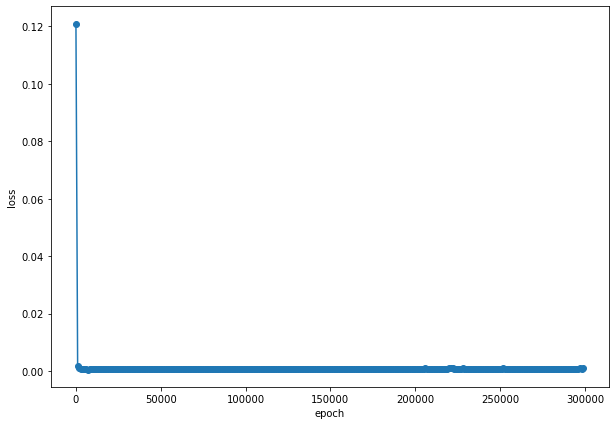

In [13]:
fig = plt.figure(figsize=(10, 7))
plt.plot(np.arange(len(losses))*1000,losses, 'o-')
plt.xlabel('epoch')
plt.ylabel('loss')

In [16]:

predicted = model(x_tes.to(device))

predicted = predicted.detach().cpu().numpy()

 
# 计算误差
result =abs(np.mean(predicted- Y_test))
print("The mean error of linear regression:")
print(result)

The mean error of linear regression:
0.0003061543887535077


In [17]:
torch.save(model,"MLP.pth")

In [11]:
model_dict=torch.load("MLP.pth")

In [26]:
r = [0.9873, 0.3418, 0.4334, 0.0633, 0.0380, 0.0253, 0.0500, 0.3418]
r=torch.Tensor(r)
yyy= [0.9955, 0.9884, 0.9806, 0.9722, 0.9631, 0.9532, 0.9425, 0.9309, 0.9183,
        0.9046, 0.8897, 0.8733, 0.8552, 0.8352, 0.8126, 0.7867, 0.7564, 0.7194,
        0.6714, 0.6000, 0.4415, 0.5034, 0.5975, 0.6411, 0.6667, 0.6827, 0.6926,
        0.6980, 0.6999, 0.6992, 0.6964, 0.6923, 0.6883, 0.6859, 0.6871, 0.6932,
        0.7040, 0.7180, 0.7334, 0.7490, 0.7641, 0.7783, 0.7915, 0.8036, 0.8148,
        0.8252, 0.8347, 0.8435, 0.8516, 0.8592, 0.8662, 0.8728, 0.8788, 0.8845,
        0.8897, 0.8946, 0.8991, 0.9033, 0.9071, 0.9106, 0.9138, 0.9167, 0.9194,
        0.9217, 0.9237, 0.9255, 0.9271, 0.9284, 0.9294, 0.9303, 0.9309, 0.9313,
        0.9315, 0.9315, 0.9313, 0.9309, 0.9303, 0.9295, 0.9284, 0.9271, 0.9256,
        0.9237, 0.9215, 0.9190, 0.9162, 0.9130, 0.9094, 0.9053, 0.9008, 0.8957,
        0.8901, 0.8840, 0.8771, 0.8695, 0.8611, 0.8517, 0.8412, 0.8294, 0.8160,
        0.8005, 0.7823, 0.7604, 0.7336, 0.6999, 0.6588, 0.6261, 0.6420, 0.6829,
        0.7188, 0.7469, 0.7689, 0.7864, 0.8004, 0.8116, 0.8203, 0.8271, 0.8321,
        0.8355, 0.8374, 0.8381, 0.8375, 0.8358, 0.8330, 0.8294, 0.8251, 0.8203,
        0.8153, 0.8103, 0.8059, 0.8022, 0.7996, 0.7984, 0.7983, 0.7994, 0.8015,
        0.8044, 0.8079, 0.8118, 0.8162, 0.8207, 0.8253, 0.8297, 0.8336, 0.8369,
        0.8393, 0.8407, 0.8412, 0.8408, 0.8395, 0.8377, 0.8356, 0.8334, 0.8315,
        0.8302, 0.8297, 0.8303, 0.8322, 0.8354, 0.8397, 0.8450, 0.8509, 0.8572,
        0.8636, 0.8696, 0.8752, 0.8801, 0.8842, 0.8875, 0.8897, 0.8911, 0.8915,
        0.8911, 0.8900, 0.8883, 0.8862, 0.8839, 0.8816, 0.8795, 0.8775, 0.8759,
        0.8746, 0.8735, 0.8725, 0.8715, 0.8701, 0.8680, 0.8649, 0.8607, 0.8555,
        0.8498, 0.8445, 0.8408, 0.8401, 0.8430, 0.8495, 0.8583, 0.8680, 0.8777,
        0.8866, 0.8944, 0.9011, 0.9069, 0.9119, 0.9163, 0.9204, 0.9244, 0.9283,
        0.9321, 0.9359, 0.9395, 0.9429, 0.9461, 0.9492, 0.9521, 0.9546, 0.9569,
        0.9589, 0.9609, 0.9629, 0.9650, 0.9669]
yyy=torch.Tensor(yyy)

Text(0, 0.5, 's11')

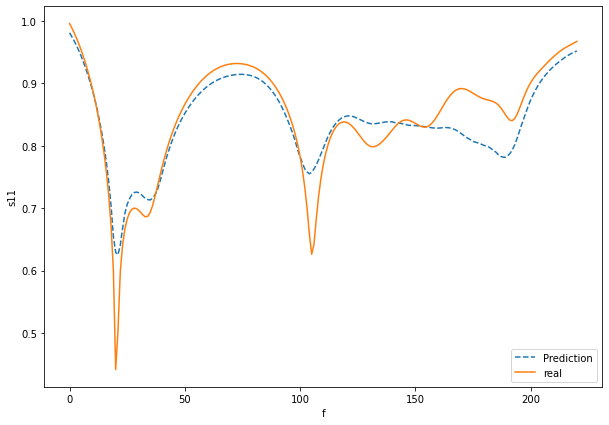

In [27]:
i = 1000

X_ver = minmaxscaler(X_test)[i,]
Y_ver = minmaxscaler(Y_test)[i,]
x_ver = torch.from_numpy(X_ver)
x_ver = x_ver.float()
y_ver = torch.from_numpy(Y_ver)
y_ver = y_ver.float()


# 用神经网络进行预测
predicted1 = model_dict(r.to(device))
predicted1 = predicted1.detach().cpu().numpy()
fig, ax = plt.subplots(figsize = (10, 7))
#plt.scatter(x_ver[: ,2],predicted1)
#plt.scatter(x_ver[: ,2],y_ver)
ax.plot(predicted1, label='Prediction', linestyle = '--')
ax.plot(yyy, label='real', linestyle = '-')
ax.legend()
ax.set_xlabel('f')
ax.set_ylabel('s11')
#print(predicted1)

In [18]:
x_ver

tensor([1.0000, 0.3671, 0.4334, 0.0886, 0.0443, 0.0000, 0.0532, 0.3418])

In [28]:
def fan_minmaxscaler(x,df):
    min = np.amin(df)
    max = np.amax(df)    
    return x*(max-min)+ min

In [31]:
e = fan_minmaxscaler(yyy,Y)
a = fan_minmaxscaler(predicted1,Y)

Text(0, 0.5, 's11')

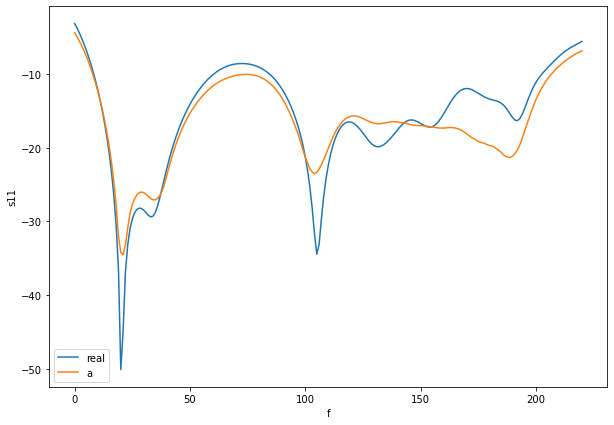

In [32]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(e, label='real', linestyle = '-')
ax.plot(a, label='a', linestyle = '-')
ax.legend()
ax.set_xlabel('f')
ax.set_ylabel('s11')

In [33]:
#test=pd.DataFrame(data=e)
#test.to_csv('./real.csv',encoding='gbk')
test=pd.DataFrame(data=a)
test.to_csv('./mlp_predicted1.csv',encoding='gbk')